In [1]:
import pandas as pd
df  =  pd.read_excel("Superstore.xlsx")
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
1       2  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
2       3  CA-2013-138688 2013-06-13 2013-06-17    Second Class    DV-13045   
3       4  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   
4       5  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [2]:
#Basic Strcture check
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
#Missing value check
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Step 1: Data Understanding

The dataset contains retail transaction data including sales, profit,discount, and regional details.
Negative  profit values  indicates loss-making orders.

In [6]:
df.duplicated().sum()
df = df.drop_duplicates()

In [7]:
#Create Profit margin column
df['Profit_Margin'] = df['Profit']/df['Sales']

In [8]:
#create Loss Flag
df['Loss_Flag'] = df['Profit'].apply(lambda x:'Loss' if x < 0 else 'Profit')

In [10]:
#create Discount  Bucket
df['Discount_Bucket'] = pd.cut(
    df['Discount'],
    bins=[-0.01,0.1,0.2,0.3,1],
    labels=['0-10%',  '10-20%', '20-30%', '>30%']
)

In [11]:
df[['Sales','Profit','Profit_Margin', 'Discount', 'Discount_Bucket','Loss_Flag']].head()

Sales    Profit  Profit_Margin  Discount Discount_Bucket Loss_Flag
0  261.9600   41.9136         0.1600      0.00           0-10%    Profit
1  731.9400  219.5820         0.3000      0.00           0-10%    Profit
2   14.6200    6.8714         0.4700      0.00           0-10%    Profit
3  957.5775 -383.0310        -0.4000      0.45            >30%      Loss
4   22.3680    2.5164         0.1125      0.20          10-20%    Profit

In [12]:
df.to_excel("Superstore_Cleaned.xlsx", index=False)

In [13]:
import pandas as pd
df  =  pd.read_excel("Superstore_Cleaned.xlsx")
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
1       2  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
2       3  CA-2013-138688 2013-06-13 2013-06-17    Second Class    DV-13045   
3       4  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   
4       5  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture        Chairs   
2  Office Supplies        Labels   
3        Furniture        Tables   
4  Office Supplies       Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  Profit_Margin  Loss_Flag  Discount_Bucket  
0     0.00   41.9136         0.1600     Profit            0-10%  
1     0.00  219.5820         0.3000     Profit            0-10%  
2     0.00    6.8714         0.4700     Profit            0-10%  
3     0.45 -383.0310        -0.4000       Loss             >30%  
4     0.20    2.5164         0.1125     Profit           10-20%  

[5 rows x 24 columns]

Step 2: Data cleaning & Feature Engineering
 - Removed duplicate records
 - Created profit margin to evaluate pricing efficiency
 - Added loss flag to identify  loss-making  orders
 - Bucketed discounts to analyze pricing  impact










In [14]:
#Overall business performance
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_sales,  total_profit

(np.float64(2297200.8603000003), np.float64(286397.0217))

The company  generates strong revenue but profit varies  across products and regions.

In [15]:
#Average profit by  discount  bucket
df.groupby('Discount_Bucket')['Profit'].mean()

Discount_Bucket
0-10%      67.460503
10-20%     24.738824
20-30%    -45.679636
>30%     -107.209930
Name: Profit, dtype: float64

Higher  discount  levels lead to lower average  profit, with losses increasing beyond 25-30% discount.

In [16]:
#Sales & Profit by Category
df.groupby('Category')[['Sales', 'Profit']].sum()

Sales       Profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481

In [17]:
#Average Profit Margin by Category
df.groupby('Category')['Profit_Margin'].mean()

Category
Furniture          0.038784
Office Supplies    0.138030
Technology         0.156138
Name: Profit_Margin, dtype: float64

Some  categories generate  high sales but low margins, indicating pricing ineffiencies.

In [18]:
#Region-wise Profit analysis
df.groupby('Region')[['Sales','Profit']].sum()

Sales       Profit
Region                           
Central  501239.8908   39706.3625
East     678781.2400   91522.7800
South    391721.9050   46749.4303
West     725457.8245  108418.4489

Certain regions contribute disproportionately to losses despite  reasonable sales volume.

In [19]:
#Top 10 Loss Products
df[df['Profit'] < 0][['Product Name', 'Profit']].sort_values(by='Profit').head(10)

Product Name     Profit
7772          Cubify CubeX 3D Printer Double Head Print -6599.9780
683           Cubify CubeX 3D Printer Triple Head Print -3839.9904
9774          GBC DocuBind P400 Electric Binding System -3701.8928
3011          Lexmark MX611dhe Monochrome Laser Printer -3399.9800
4991               Ibico EPK-21 Electric Binding System -2929.4845
3151          Cubify CubeX 3D Printer Double Head Print -2639.9912
5310  Fellowes PB500 Electric Punch Plastic Comb Bin... -2287.7820
9639  Chromcraft Bull-Nose Wood Oval Conference Tabl... -1862.3124
1199          GBC DocuBind P400 Electric Binding System -1850.9464
2697  Cisco TelePresence System EX90 Videoconferenci... -1811.0784

A Small set of products consistently generate significant  losses.

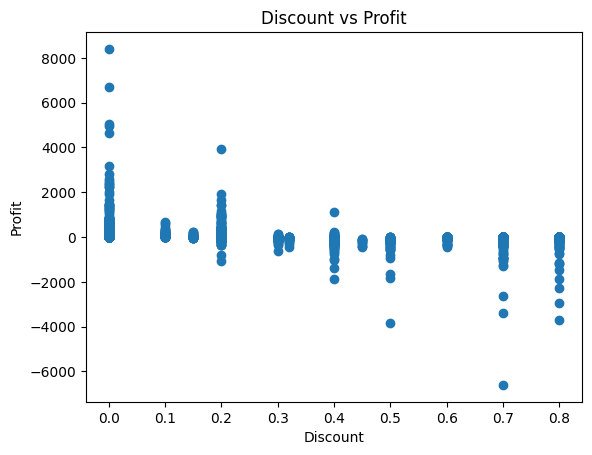

In [20]:
#Visual analysis for Discount vs Profit (Scatter)
import matplotlib.pyplot as plt
plt.scatter(df['Discount'],df['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Discount vs Profit')
plt.show()

Profit decreses sharply  as discount increases.

Step 3: Exploratory data  analysis
EDA revealed a strong  negative relationship between discount and Profitability.
High discount levels consistently  result in loss-making orders.
Category and regional analysis shows uneven profit distribution.